## 8.2 감성 사전을 이용한 영화 리뷰 감성 분석
- 어휘 기반
### 8.2.1 NLTK 영화 리뷰 데이터 준비

In [1]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews
print("#review count : {}".format(len(movie_reviews.fileids())))  # 영화 리뷰 문서의 id를 반환

d:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\namyo\AppData\Roaming\nltk_data...


#review count : 2000


[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
print('#samples of file ids : {}'.format(movie_reviews.fileids()[:10]))  # id를 10개까지만 출력
print('#categories of reviews : {}'.format(movie_reviews.categories()))  # label
print('#num of neg reviews : {}'.format(len(movie_reviews.fileids(categories='neg'))))
print('#num of pos reviews : {}'.format(len(movie_reviews.fileids(categories='pos'))))

fileid = movie_reviews.fileids()[0]  # 첫 번째 문서 id를 반환
print('#id of the first review : {}'.format(fileid))
print('#part of the first review : {}'.format(movie_reviews.raw(fileid)[:500]))
print('#sentiment of the first review : {}'.format(movie_reviews.categories(fileid)))

# 영화 리뷰 데이터에서 파일 id를 가져옴
fileids = movie_reviews.fileids()

# 파일 id를 이용해 raw text file을 가져옴
reviews = [ movie_reviews.raw(fileid) for fileid in fileids ]
categories = [ movie_reviews.categories(fileid)[0] for fileid in fileids ]

#samples of file ids : ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews : ['neg', 'pos']
#num of neg reviews : 1000
#num of pos reviews : 1000
#id of the first review : neg/cv000_29416.txt
part of the first review : plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
sentiment of the first review : ['neg']


### [8.2.2 TextBlob을 이용한 감성 분석](https://textblob.readthedocs.io/en/dev/)

In [3]:
from textblob import TextBlob
result = TextBlob(reviews[0])  # 첫째 리뷰에 대한 결과
print("Part of speech tagging : {}".format(result.tags, "\n"))
print("Noun Phrase Extraction : {}".format(result.noun_phrases, "\n"))
print("Sentiment Analysis : {}".format(result.sentiment))

Part of speech tagging : [('plot', 'NN'), ('two', 'CD'), ('teen', 'NN'), ('couples', 'NNS'), ('go', 'VBP'), ('to', 'TO'), ('a', 'DT'), ('church', 'NN'), ('party', 'NN'), ('drink', 'NN'), ('and', 'CC'), ('then', 'RB'), ('drive', 'NN'), ('they', 'PRP'), ('get', 'VBP'), ('into', 'IN'), ('an', 'DT'), ('accident', 'NN'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('guys', 'NN'), ('dies', 'VBZ'), ('but', 'CC'), ('his', 'PRP$'), ('girlfriend', 'NN'), ('continues', 'VBZ'), ('to', 'TO'), ('see', 'VB'), ('him', 'PRP'), ('in', 'IN'), ('her', 'PRP$'), ('life', 'NN'), ('and', 'CC'), ('has', 'VBZ'), ('nightmares', 'NNS'), ('what', 'WP'), ("'s", 'VBZ'), ('the', 'DT'), ('deal', 'NN'), ('watch', 'VB'), ('the', 'DT'), ('movie', 'NN'), ('and', 'CC'), ('sorta', 'JJ'), ('find', 'VB'), ('out', 'RP'), ('critique', 'NN'), ('a', 'DT'), ('mind-fuck', 'JJ'), ('movie', 'NN'), ('for', 'IN'), ('the', 'DT'), ('teen', 'JJ'), ('generation', 'NN'), ('that', 'WDT'), ('touches', 'VBZ'), ('on', 'IN'), ('a', 'DT'), ('very

In [4]:
def sentiment_TextBlob(docs):
    results = []
    
    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

In [5]:
from sklearn.metrics import accuracy_score
print('#TextBlob을 이용한 리뷰 감성분석의 정확도 : ',
    accuracy_score(categories, sentiment_TextBlob(reviews))
)

#TextBlob을 이용한 리뷰 감성분석의 정확도 :  0.6


### 8.2.3 AFINN을 이용한 감성 분석
```python
%pip install afinn
```

In [6]:
from afinn import Afinn

def sentiment_Afinn(docs):
    afn = Afinn(emoticons=True)
    results = []
    
    for doc in docs:
        if afn.score(doc) > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

print('#Afinn을 이용한 리뷰 감성 분석의 정확도 : ',
    accuracy_score(categories, sentiment_Afinn(reviews))
)

#Afinn을 이용한 리뷰 감성 분석의 정확도 :  0.664


### 8.2.4 VADER를 이용한 감성 분석

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\namyo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
from afinn import Afinn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(docs):
    analyser = SentimentIntensityAnalyzer()
    results = []
    
    for doc in docs:
        score = analyser.polarity_scores(doc)
        if score['compound'] > 0:
            results.append('pos')
        else:
            results.append('neg')
    
    return results
print('#VADER을 이용한 리뷰 감성 분석 정확도 : ',
    accuracy_score(categories, sentiment_vader(reviews))
)

#VADER을 이용한 리뷰 감성 분석 정확도 :  0.635


## 8.3 학습을 통한 머신러닝 기반의 감성 분석
### 8.3.1 NLTK 영화 리뷰에 대한 머신러닝 기반 감성 분석

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    reviews, categories, test_size=0.2, random_state=7
)

print('Train set count : {}'.format(len(X_train)))
print('Test set count : {}'.format(len(X_test)))

Train set count : 1600
Test set count : 400


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print('#Train set dimension : {}'.format(X_train_tfidf.shape))
print('#Test set dimension : {}'.format(X_test_tfidf.shape))

NB_clf = MultinomialNB(alpha=0.01)
NB_clf.fit(X_train_tfidf, y_train)

print('#Train set score : {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))
print('#Test set score : {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

#Train set dimension : (1600, 36189)
#Test set dimension : (400, 36189)
#Train set score : 0.998
#Test set score : 0.797


### 8.3.2 다음 영화 리뷰에 대한 머신러닝 기반 감성 분석

In [12]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


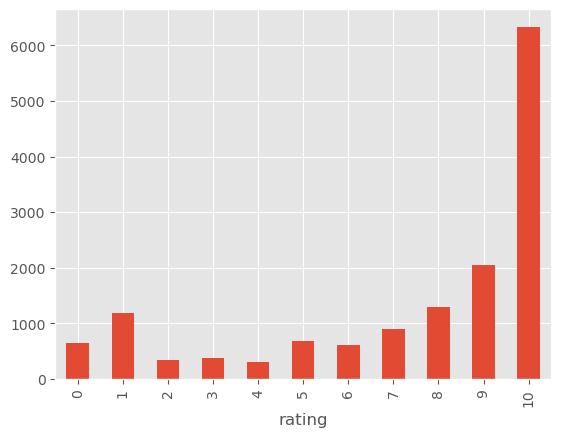

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df['rating'].value_counts().sort_index().plot(kind='bar')
#df['rating'].plot.hist(bins=10)  # 히스토그램
plt.show();

In [14]:
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['rating'], random_state=7
)
print('#Train set size : {}'.format(len(X_train)))
print('#Test set size : {}'.format(len(X_test)))

okt = Okt()

def twit_tokenizer(text):  # 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in okt.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
    return result

# 명사, 동사, 형용사를 이용해 tfidf 생성
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer,
                        max_features=2000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 다중회귀분석 실시
lr = LinearRegression()
lr.fit(X_train_tfidf, y_train)
print('#Regression Train set R2 score : {}'.format(lr.score(X_train_tfidf, y_train)))
print('#Regression Test set R2 score : {}'.format(lr.score(X_test_tfidf, y_test)))

#Train set size : 11043
#Test set size : 3682


d:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#Regression Train set R2 score : 0.6045480181543007
#Regression Test set R2 score : 0.39500332535456006


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_senti = (y_train > 5)
y_test_senti = (y_test > 5)

y_train_predict = (lr.predict(X_train_tfidf) > 5)
y_test_predict = (lr.predict(X_test_tfidf) > 5)

# 정밀도
train_precision_score = precision_score(y_train_senti, y_train_predict)
test_precision_score = precision_score(y_test_senti, y_test_predict)

# 재현율
train_recall_score = recall_score(y_train_senti, y_train_predict)
test_recall_score = recall_score(y_test_senti, y_test_predict)

# f1-score
train_f1_score = f1_score(y_train_senti, y_train_predict)
test_f1_score = f1_score(y_test_senti, y_test_predict)

# 정확도
train_accuracy_score = accuracy_score(y_train_senti, y_train_predict)
test_accuracy_score = accuracy_score(y_test_senti, y_test_predict)

print('#Train precision score : {}'.format(train_precision_score))
print('#Test precision score : {}\n'.format(test_precision_score))

print('#Train recall score : {}'.format(train_recall_score))
print('#Test recall score : {}\n'.format(test_recall_score))

print('#Train f1 score : {}'.format(train_f1_score))
print('#Test f1 score : {}\n'.format(test_f1_score))

print('#Train accuracy score : {}'.format(train_accuracy_score))
print('#Test accuracy score : {}'.format(test_accuracy_score))

#Train precision score : 0.8931011681728014
#Test precision score : 0.867862969004894

#Train recall score : 0.968682763566818
#Test recall score : 0.9456096693921081

#Train f1 score : 0.9293577981651375
#Test f1 score : 0.905069751616196

#Train accuracy score : 0.8884361133749887
#Test accuracy score : 0.8484519282998371


In [18]:
from sklearn.linear_model import LogisticRegression #sklearn이 제공하는 logistic regression을 사용

#count vector에 대해 regression을 해서 NB와 비교
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train_senti) # train data를 이용하여 분류기를 학습

y_train_predict = LR_clf.predict(X_train_tfidf)
y_test_predict = LR_clf.predict(X_test_tfidf)

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.878
#Precision for train set: 0.878
#Recall for train set: 0.973
#F1 for train set: 0.923
#Accuracy for test set: 0.855
#Precision for test set: 0.866
#Recall for test set: 0.958
#F1 for test set: 0.910
